In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the California Housing Data Set from sklearn.datasets and print it
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

Dataset CSV Excerpt
-------------------
![image.png](img/cali_dataset_excerpt.png)

In [3]:
# Transform dataset into a dataframe
  # .data -> raw numbers
  # .feature_names -> column identifiers
  # .target -> target variable that we care about h. median house value
df_x = pd.DataFrame(california.data, columns = california.feature_names)
df_y = pd.DataFrame(california.target)

In [4]:
print(df_x)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [5]:
print(df_y)

           0
0      4.526
1      3.585
2      3.521
3      3.413
4      3.422
...      ...
20635  0.781
20636  0.771
20637  0.923
20638  0.847
20639  0.894

[20640 rows x 1 columns]


In [6]:
# General statistics of the dataset
df_x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


<h4> About : sklearn.model_selection.train_test_split </h4>

```python
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```

Split arrays or matrices into random train and test subsets

Learn more at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
# Initializing the linear regression model
reg = linear_model.LinearRegression()

#Splitting dataset int 67% training and 33% testing
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

# Training model with training data
reg.fit(x_train, y_train)

LinearRegression()

In [8]:
# Print the coefecients/weights for each feature/column of our model
print(reg.coef_)

[[ 4.44870466e-01  9.55004561e-03 -1.21991503e-01  7.79144696e-01
  -7.68990809e-08 -3.29948505e-03 -4.19131153e-01 -4.34103468e-01]]


In [9]:
# Print Price Prediction of Test Data
y_pred = reg.predict(x_test)
y_test = pd.DataFrame(y_test.to_numpy())
y_pred = pd.DataFrame(y_pred)
df_results = pd.DataFrame({'Actual': y_test[0], 'Predicted': y_pred[0]})
print(df_results)

       Actual  Predicted
0     0.47700   0.725635
1     0.45800   1.766502
2     5.00001   2.705458
3     2.18600   2.833254
4     2.78000   2.604101
...       ...        ...
6807  1.66100   1.124813
6808  0.93600   1.680167
6809  1.07000   1.258031
6810  1.30700   1.666730
6811  3.07100   2.258263

[6812 rows x 2 columns]


In [10]:
# Check model performance using Mean Squared Error (MSE)
y_test = y_test.to_numpy()
x_test = x_test.to_numpy()
y_pred = y_pred.to_numpy()

print("MSE = ", end = '')
print(np.mean((y_pred-y_test)**2))

MSE = 0.5369686543372464


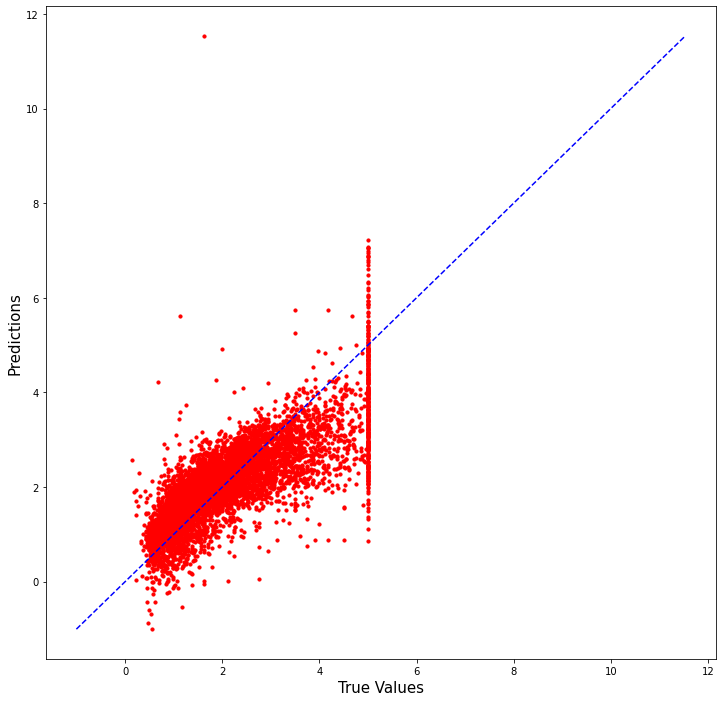

In [11]:
# Plotting using matplotlib

#plt.scatter(x_test[:100,7], y_test[:100], color="black")
#plt.scatter(x_test[:100,7], y_pred[:100], color="blue")
x = y_test
y = y_pred

plt.figure(figsize=(12,12))

plt.scatter(x, y, color="red", s=10)

p1 = min(min(x),min(y))
p2 = max(max(x),max(y))
plt.plot([p1,p2],[p1,p2], 'b--')

#plt.scatter(x,m)

#plt.xticks(())
#plt.yticks(())
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')

plt.show()

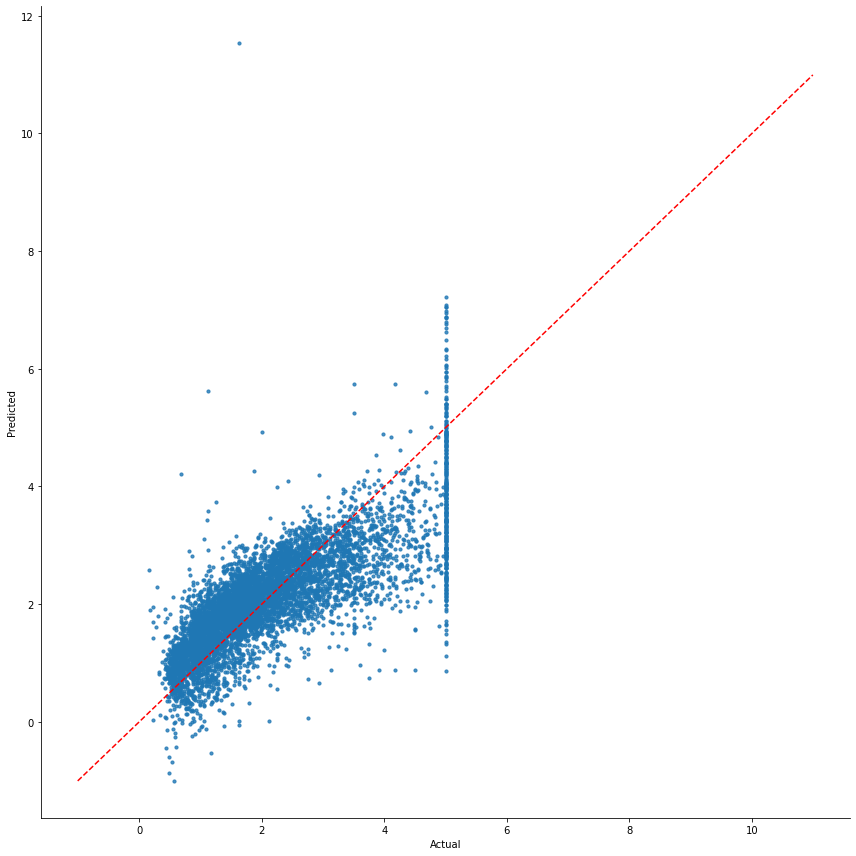

In [12]:
# Plotting using seaborn
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=12, scatter_kws={"s": 10})
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

In [13]:
df_results.describe()

,Actual,Predicted
count,6812.000000,6812.000000
mean,2.072460,2.066467
std,1.154464,0.901767
min,0.149990,-1.005633
25%,1.200750,1.506680
50%,1.810000,2.015313
75%,2.659000,2.556643
max,5.000010,11.532073
